In [1]:
import numpy as np , pandas as pd 
from data_pipeline import transformation_pipeline
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
data = pd.read_csv('content/preprocessed_train.csv')

In [3]:
pipeline, data_cleaned= transformation_pipeline(data, building_id=122 , meter=0 , primary_use= 99 )

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [4]:
transformed_data= pipeline.fit_transform(data_cleaned)
pd.DataFrame(transformed_data , index=data_cleaned.index , columns= data_cleaned.columns ).head()

,meter_reading,air_temperature,dew_temperature,sea_level_pressure,wind_direction,wind_speed,day,month,hour
timestamp,,,,,,,,,
2016-01-01 00:00:00,0.000000,0.209239,0.381757,0.659280,0.666667,0.167568,1.0,1.0,0.0
2016-01-01 01:00:00,0.364635,0.206522,0.381757,0.668975,0.638889,0.140541,1.0,1.0,1.0
2016-01-01 02:00:00,0.369028,0.176630,0.364865,0.673130,0.000000,0.000000,1.0,1.0,2.0
2016-01-01 03:00:00,0.366282,0.160326,0.341216,0.678670,0.472222,0.081081,1.0,1.0,3.0
2016-01-01 04:00:00,0.366557,0.168478,0.361486,0.684211,0.305556,0.081081,1.0,1.0,4.0


In [12]:
transformed_data[:,0] # this gives us the meter reading

array([0.        , 0.36463482, 0.36902801, ..., 0.2800659 , 0.27594728,
       0.27841845])

In [13]:
transformed_data[:, 1:]# this gives us the rest of the columns

array([[ 0.20923913,  0.38175676,  0.65927978, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.20652174,  0.38175676,  0.66897507, ...,  1.        ,
         1.        ,  1.        ],
       [ 0.17663043,  0.36486486,  0.67313019, ...,  1.        ,
         1.        ,  2.        ],
       ...,
       [ 0.29347826,  0.49662162,  0.73268698, ..., 31.        ,
        12.        , 21.        ],
       [ 0.29347826,  0.51013514,  0.72160665, ..., 31.        ,
        12.        , 22.        ],
       [ 0.30978261,  0.52027027,  0.71191136, ..., 31.        ,
        12.        , 23.        ]])

In [14]:
x_train,x_val,y_train,y_val= train_test_split(  transformed_data[:, 1:] ,
                                                transformed_data[:,0] ,
                                                test_size=0.2,
                                                shuffle=False,
                                                random_state=2021)

In [17]:
train_gen= tf.keras.preprocessing.sequence.TimeseriesGenerator( x_train, 
                                                                y_train , 
                                                                length=6 ,sampling_rate=1, 
                                                                stride=1, batch_size=32
                                                                )

val_gen= tf.keras.preprocessing.sequence.TimeseriesGenerator(   x_val , 
                                                                y_val  , 
                                                                length=6 ,sampling_rate=1, 
                                                                stride=1, batch_size=32
                                                                )

In [91]:
model= tf.keras.Sequential([tf.keras.layers.LSTM(128 , activation='relu' ,return_sequences=False),
        tf.keras.layers.Dense(1) ] )

In [92]:
model.compile(loss='mse', optimizer= tf.keras.optimizers.SGD(0.0001))

#cb= tf.keras.callbacks.ModelCheckpoint('models/LSTM_per_hour_model', monitor='val_loss', verbose=0, save_best_only=True)
# Fitting the model
history=model.fit(train_gen, 
                  validation_data= val_gen,
                  epochs=30 ,
                  #callbacks=[cb],
                  shuffle=False)

Epoch 1/30
219/219 [==============================] - 2s 9ms/step - loss: 0.0612 - val_loss: 0.0626
Epoch 2/30
219/219 [==============================] - 2s 7ms/step - loss: 0.0388 - val_loss: 0.0539
Epoch 3/30
219/219 [==============================] - 2s 8ms/step - loss: 0.0312 - val_loss: 0.0482
Epoch 4/30
219/219 [==============================] - 2s 8ms/step - loss: 0.0265 - val_loss: 0.0438
Epoch 5/30
219/219 [==============================] - 2s 8ms/step - loss: 0.0234 - val_loss: 0.0403
Epoch 6/30
219/219 [==============================] - 2s 8ms/step - loss: 0.0211 - val_loss: 0.0374
Epoch 7/30
219/219 [==============================] - 2s 8ms/step - loss: 0.0195 - val_loss: 0.0351
Epoch 8/30
219/219 [==============================] - 2s 8ms/step - loss: 0.0183 - val_loss: 0.0331
Epoch 9/30
219/219 [==============================] - 2s 8ms/step - loss: 0.0174 - val_loss: 0.0315
Epoch 10/30
219/219 [==============================] - 2s 8ms/step - loss: 0.0166 - val_loss: 0.0301

In [40]:
val_gen[7][1] # where 7 is the batch , 0 stands for the features and 1 stands for the output

array([0.3465129 , 0.35118067, 0.37726524, 0.3734212 , 0.36463482,
       0.35694673, 0.35914333, 0.35172982, 0.34239429, 0.34184514,
       0.3239978 , 0.30395387, 0.31246568, 0.31383855, 0.31164195,
       0.3261944 , 0.32344865, 0.31850632, 0.30834706, 0.30093355,
       0.29763866, 0.3036793 , 0.30477759, 0.31933004, 0.33305876,
       0.33168589, 0.31768259, 0.32894014, 0.33250961, 0.31658429,
       0.32811642, 0.3261944 ])

In [93]:
predicted_batch_7 = model.predict (val_gen[7][0] )

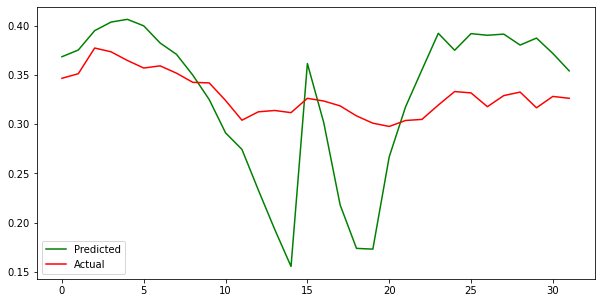

In [106]:
import matplotlib.pyplot as plt
_, ax=plt.subplots(figsize=(10,5))
ax.plot(range(32),
         predicted_batch_7,
        color='green',label='Predicted')

ax.plot( range(32),
         val_gen[7][1],
        color='red',label='Actual')
ax.legend()


In [103]:
# lets try predicting more than one patch

predicted=[]
actual=[]
for i in range(32):
    predicted.extend(model.predict (val_gen[i][0] )  )
    actual.extend( val_gen[i][1])  


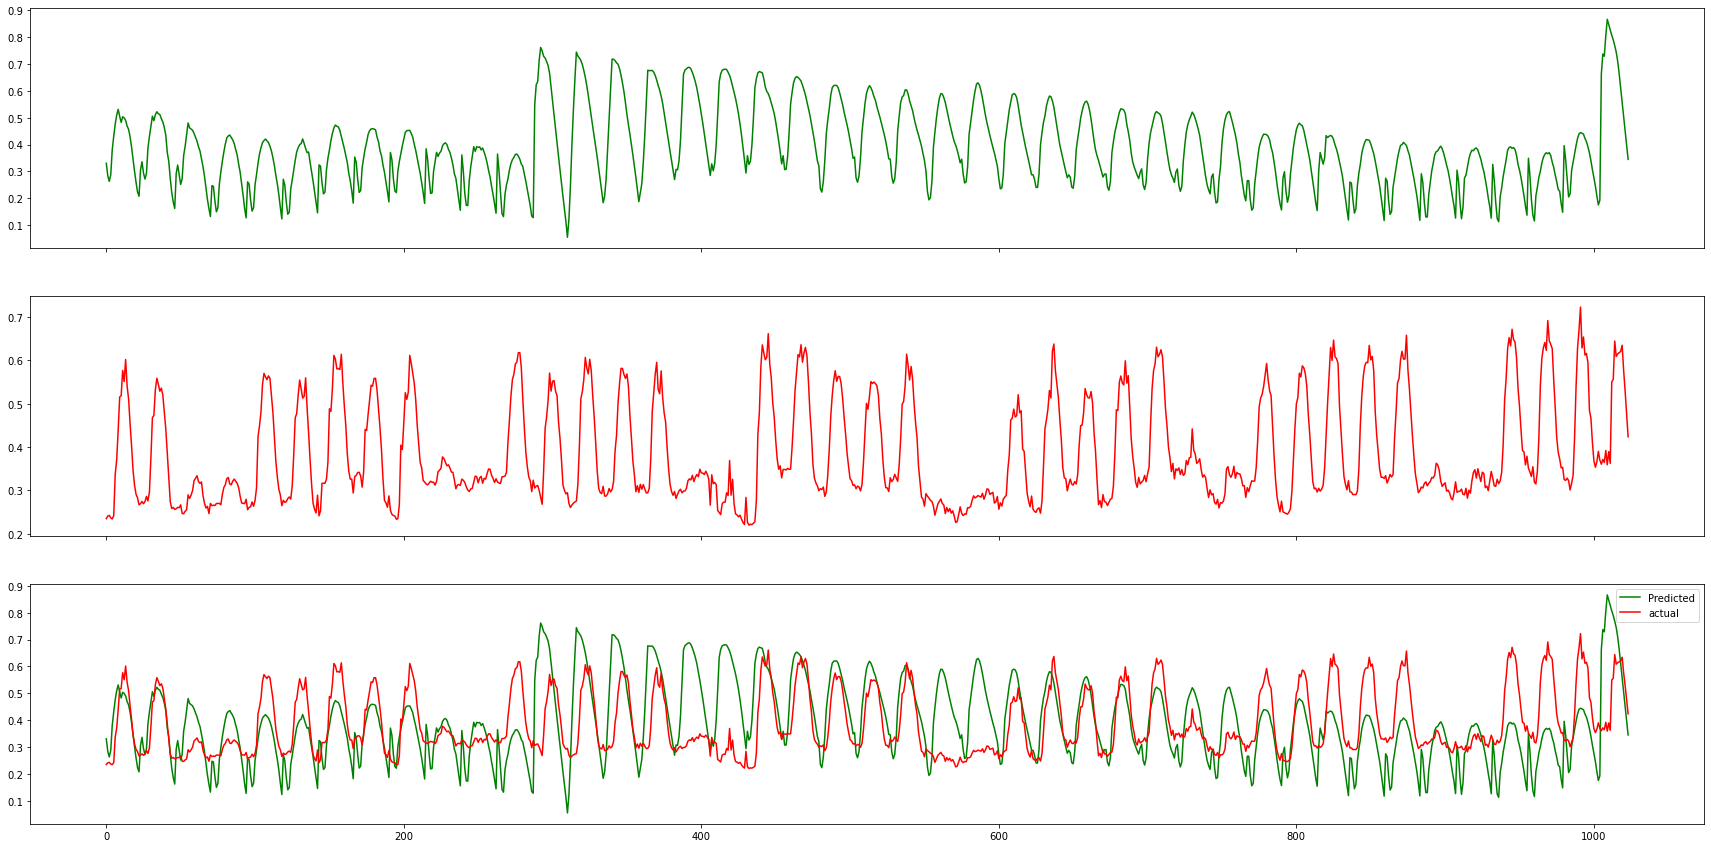

In [97]:
fig , (ax1 , ax2, ax) = plt.subplots( 3,1 ,  figsize=(30,15), sharex=True )

ax1.plot(range(len(actual)) ,
         predicted,
         color='green')

ax2.plot( range(len(actual)) ,
          actual,
          color='red')


ax.plot(range(len(actual)) ,
         predicted,
         color='green',
           label='Predicted')

ax.plot( range(len(actual)) ,
          actual,
          color='red',
           label='actual')

plt.legend()


In [98]:
## Let's try to see the effect on the training data

In [99]:

predicted_t=[]
actual_t=[]
for i in range(32):
    predicted_t.extend(model.predict (train_gen[i][0] )  )
    actual_t.extend( train_gen[i][1])  

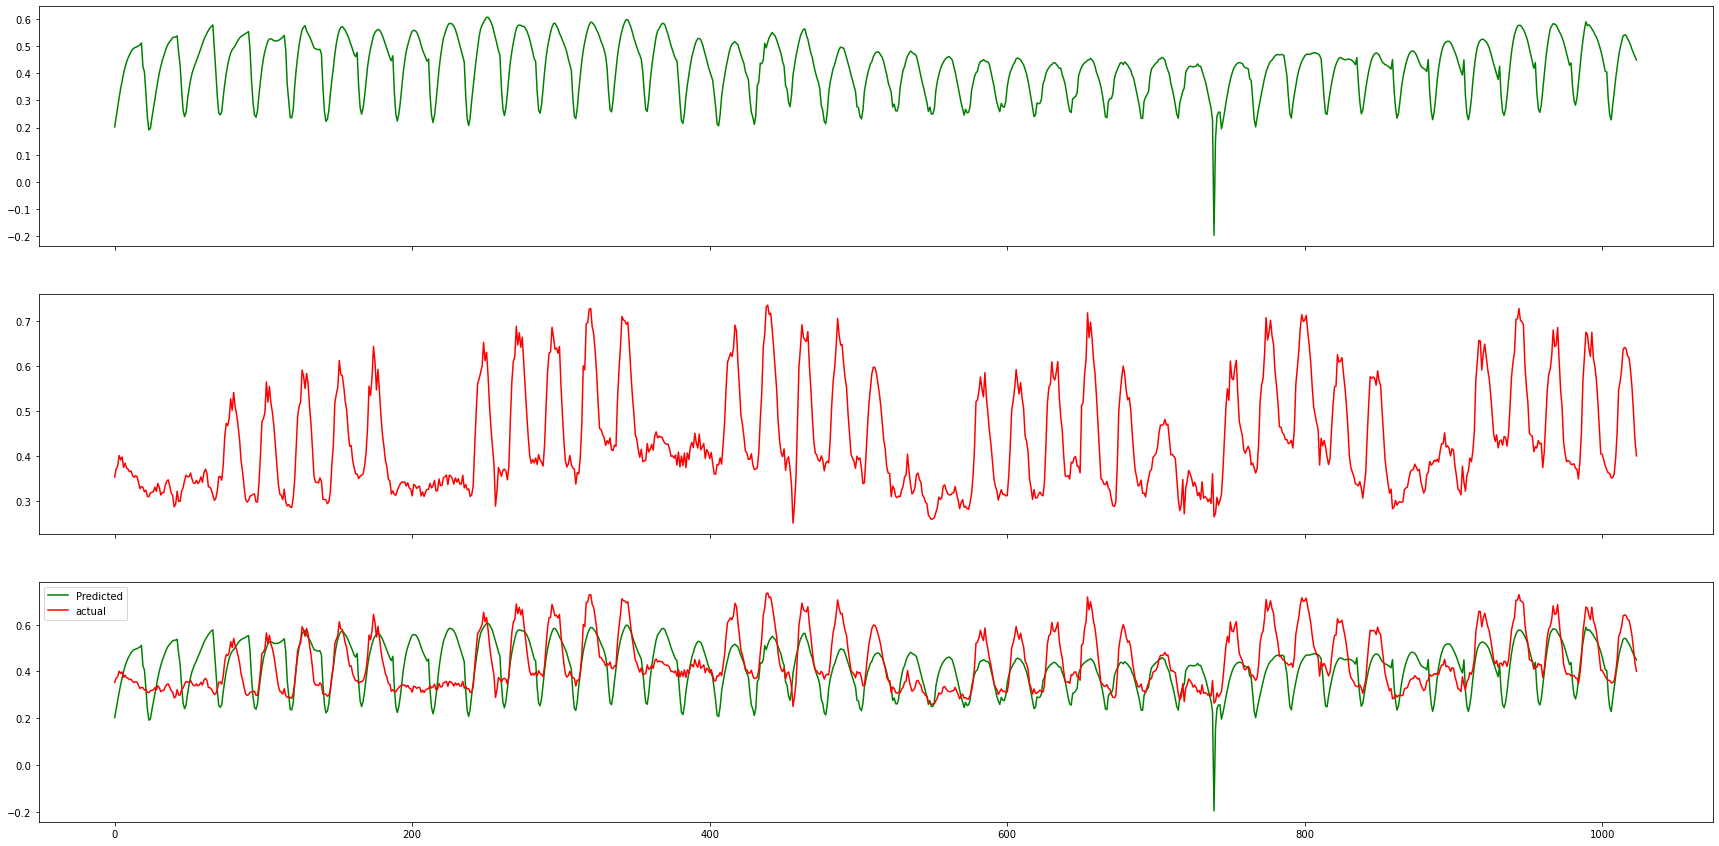

In [100]:
fig , (ax1 , ax2, ax) = plt.subplots( 3,1 ,  figsize=(30,15), sharex=True )

ax1.plot(range(len(actual_t)) ,
         predicted_t,
         color='green')

ax2.plot( range(len(actual_t)) ,
          actual_t,
          color='red')


ax.plot(range(len(actual_t)) ,
         predicted_t,
         color='green',
           label='Predicted')

ax.plot( range(len(actual_t)) ,
          actual_t,
          color='red',
           label='actual')

plt.legend()
